In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb

In [2]:
dataset = pd.read_csv("data-curah-hujan.csv")
dataset.head()

,Stasiun,Tahun,Bulan,Jumlah Ch,Keterangan Ch
0,BINANGUN,1980,1,315.0,2
1,BINANGUN,1980,2,123.0,1
2,BINANGUN,1980,3,334.0,2
3,BINANGUN,1980,4,246.0,1
4,BINANGUN,1980,5,65.0,0


In [3]:
dataset.tail()

,Stasiun,Tahun,Bulan,Jumlah Ch,Keterangan Ch
5791,POS HUJAN WANAREJA,2019,8,NaN,3
5792,POS HUJAN WANAREJA,2019,9,NaN,3
5793,POS HUJAN WANAREJA,2019,10,NaN,3
5794,POS HUJAN WANAREJA,2019,11,NaN,3
5795,POS HUJAN WANAREJA,2019,12,NaN,3


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 5 columns):
Stasiun          5796 non-null object
Tahun            5796 non-null int64
Bulan            5796 non-null int64
Jumlah Ch        3786 non-null float64
Keterangan Ch    5796 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 226.5+ KB


In [5]:
dataset[dataset.isna().any(axis=1)]

,Stasiun,Tahun,Bulan,Jumlah Ch,Keterangan Ch
26,BINANGUN,1982,3,NaN,3
29,BINANGUN,1982,6,NaN,3
31,BINANGUN,1982,8,NaN,3
32,BINANGUN,1982,9,NaN,3
33,BINANGUN,1982,10,NaN,3
...,...,...,...,...,...
5791,POS HUJAN WANAREJA,2019,8,NaN,3
5792,POS HUJAN WANAREJA,2019,9,NaN,3
5793,POS HUJAN WANAREJA,2019,10,NaN,3
5794,POS HUJAN WANAREJA,2019,11,NaN,3


In [8]:
dataset = dataset.dropna()

In [6]:
from sklearn.preprocessing import LabelEncoder
for column in dataset.columns:
    if dataset[column].dtype == type(object):
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column])

In [9]:
dataset['Jumlah Ch'] = dataset['Jumlah Ch'].astype('int')
print(dataset['Jumlah Ch'])

0       315
1       123
2       334
3       246
4        65
       ... 
5784    202
5785    193
5787    104
5788     16
5789      0
Name: Jumlah Ch, Length: 3786, dtype: int32


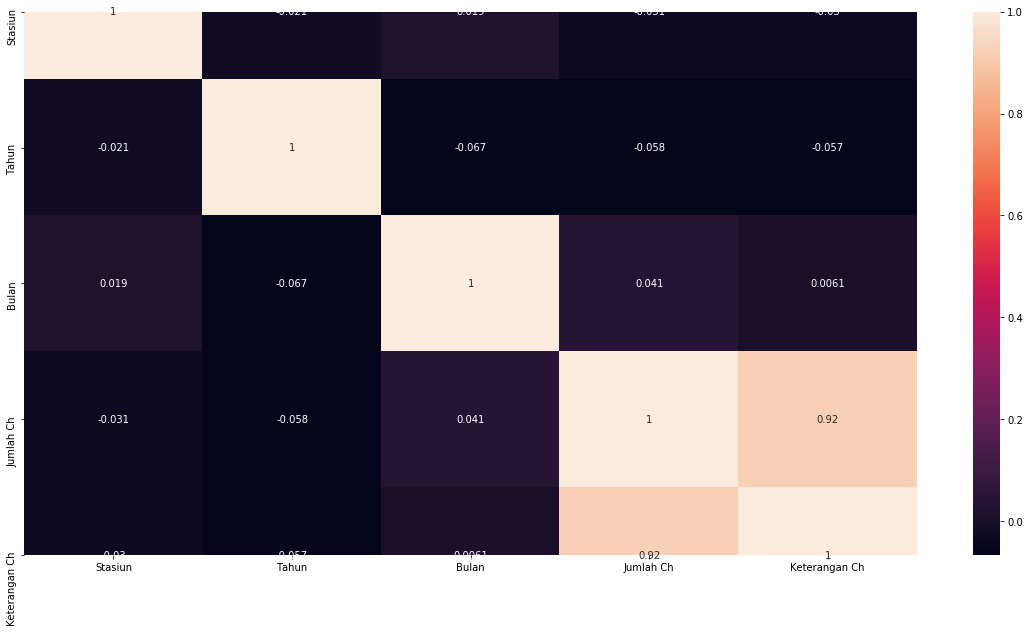

In [10]:
plt.figure(figsize=(20,10))
sb.heatmap(dataset.corr(), annot=True)

In [11]:
dataset.columns

Index(['Stasiun', 'Tahun', 'Bulan', 'Jumlah Ch', 'Keterangan Ch'], dtype='object')

In [12]:
feature_data = dataset[['Stasiun', 'Tahun', 'Bulan', 'Keterangan Ch']]
X = np.asarray(feature_data)
y = np.asarray(dataset['Jumlah Ch'])
# X[0:10]
y[0:10]

array([315, 123, 334, 246,  65,  18,  41, 107,  52, 347])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=4)

In [14]:
from sklearn.preprocessing import Normalizer
data_scaled = Normalizer().fit(dataset)
normalized_data = data_scaled.transform(dataset)
normalized_data = pd.DataFrame(normalized_data, 
                               index=dataset.index, 
                               columns=dataset.columns)
print(normalized_data)

       Stasiun     Tahun     Bulan  Jumlah Ch  Keterangan Ch
0     0.000000  0.987580  0.000499   0.157115       0.000998
1     0.000000  0.998075  0.001008   0.062002       0.000504
2     0.000000  0.986067  0.001494   0.166337       0.000996
3     0.000000  0.992368  0.002005   0.123294       0.000501
4     0.000000  0.999458  0.002524   0.032811       0.000000
...        ...       ...       ...        ...            ...
5784  0.010349  0.994979  0.000493   0.099547       0.000493
5785  0.010353  0.995408  0.000986   0.095153       0.000493
5787  0.010387  0.998620  0.001978   0.051440       0.000495
5788  0.010400  0.999911  0.002476   0.007924       0.000000
5789  0.010401  0.999941  0.002972   0.000000       0.000000

[3786 rows x 5 columns]


In [15]:
X_train.shape

(2650, 4)

In [16]:
y_train.shape

(2650,)

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
rfc_predictions = rfc.predict(X_test)
rfc_predictions

array([ 82, 207, 280, ..., 481, 153,  80])

In [18]:
rfc_predictions.mean()

254.39700704225353

In [23]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ', accuracy_score(
    y_test, rfc_predictions)*100, '%')

Accuracy score:  1.584507042253521 %


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_predictions))

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.25      0.14      0.18         7
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8
           6       0.12      0.10      0.11        10
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.50      0.25      0.33         4
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         6
          17       0.00    